In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
print('Welcome! We will make explode some projectiles!')
M = float(input('Input the mass of the projectile : '))
N = int(input('Input the number of pieces the projectile should break into : '))
m = M/N
t = float(input('Input the time of the explosion : '))
x0 = float(input('Input x0 : '))
y0 = float(input('Input y0 : '))
v0 = float(input('Input the starting speed : '))
angle = float(input('Input the angle in degrees : '))
E = float(input('Input the Energy of the explosion : '))

Welcome! We will make explode some projectiles!
Input the mass of the projectile : 10
Input the number of pieces the projectile should break into : 10
Input the time of the explosion : 4
Input x0 : 0
Input y0 : 10
Input the starting speed : 10
Input the angle in degrees : 60
Input the Energy of the explosion : 10


In [36]:
def EvolveParticle(x0, y0, v0, angle, dt, t = float('inf')):
    g = 9.81
    x_array = []
    y_array = []
    i = 0
    while(True):
        if(i*dt >= t):
            break
        x = x0 + v0*np.cos(angle)*i*dt
        y = y0 + v0*np.sin(angle)*i*dt - 0.5*g*i*i*dt*dt
        if(y >= 0):
            x_array.append(x)
            y_array.append(y)
        else:
            break
        i += 1
    return x_array,y_array

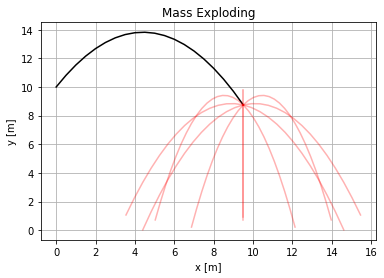

In [87]:
%matplotlib inline
xM,yM = EvolveParticle(x0, y0, v0, np.radians(angle), 0.1, t/2)
plt.plot(xM,yM, 'black')
pieces_x = []
pieces_y = []
for i in range(0,N):
    x,y = EvolveParticle(xM[-1], yM[-1], np.sqrt(2*E/m), 2*np.pi*i/N + np.pi/2, 0.1)
    pieces_x.append(x)
    pieces_y.append(y)
    plt.plot(x,y, 'red', alpha = 0.3)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mass Exploding')
plt.grid()
plt.show()

In [40]:
import matplotlib.animation as animation

In [154]:
# %matplotlib notebook
# # Create a figure object
# fig = plt.figure()

# # Add subplot (just 1) and set x and y limits based on data.
# # 111 means "1x1 grid, 1st subplot".
# # ax is the object containing objects to be plotted.
# ax = fig.add_subplot(111, autoscale_on=True, xlim=(-0.1, max(xM)*2), ylim=(-0.1,max(yM)*1.2))
# ax.grid()
# ax.set_xlabel('x(t) [m]')
# ax.set_ylabel("y(t) [m]")
# plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,angle))

# line = ax.plot(xM[0], yM[0], 'o', lw=2)
# line1 = [ax.plot(pieces_x[i][0], pieces_y[i][0], 'o', lw=2)[0] for i in range(N)]

# def update_plots(i):
#     if(xM[i] == xM[-1]):
#         line[0].set_data(-1, -1)
#         for j in range(N):
#             line1[j].set_data(pieces_x[j][-i], pieces_y[j][-i])
#     else:
#         line[0].set_data(xM[i], yM[i])
#         for j in range(N):
#             line1[j].set_data(-1, -1)

#     return line1,line[0]

# anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x)+len(xM)), interval=100, blit=True, repeat=True)

# plt.show()

<IPython.core.display.Javascript object>


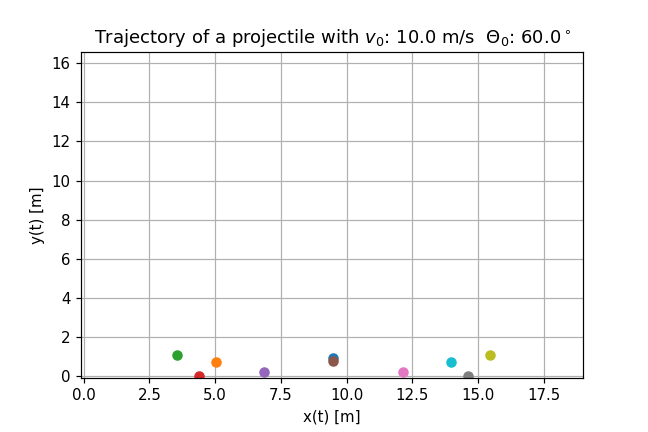

In [170]:
%matplotlib notebook
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data.
# 111 means "1x1 grid, 1st subplot".
# ax is the object containing objects to be plotted.
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-0.1, max(xM)*2), ylim=(-0.1,max(yM)*1.2))
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,angle))

line1 = [ax.plot(pieces_x[i][0], pieces_y[i][0], 'o', lw=2)[0] for i in range(N)]

def update_plots(i):
    for j in range(N):
        if(pieces_x[-1] == pieces_x[i]):
            line1[j].set_data(pieces_x[j][-1], pieces_y[j][-1])
        else:
            line1[j].set_data(pieces_x[j][i], pieces_y[j][i])
    return line1,

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, 2*len(x)), interval=50, blit=True, repeat=True)

plt.show()